# Import

Commençons par importer les différentes librairies.

In [1]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Chemin vers le dossier
print(os.listdir("/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk"))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


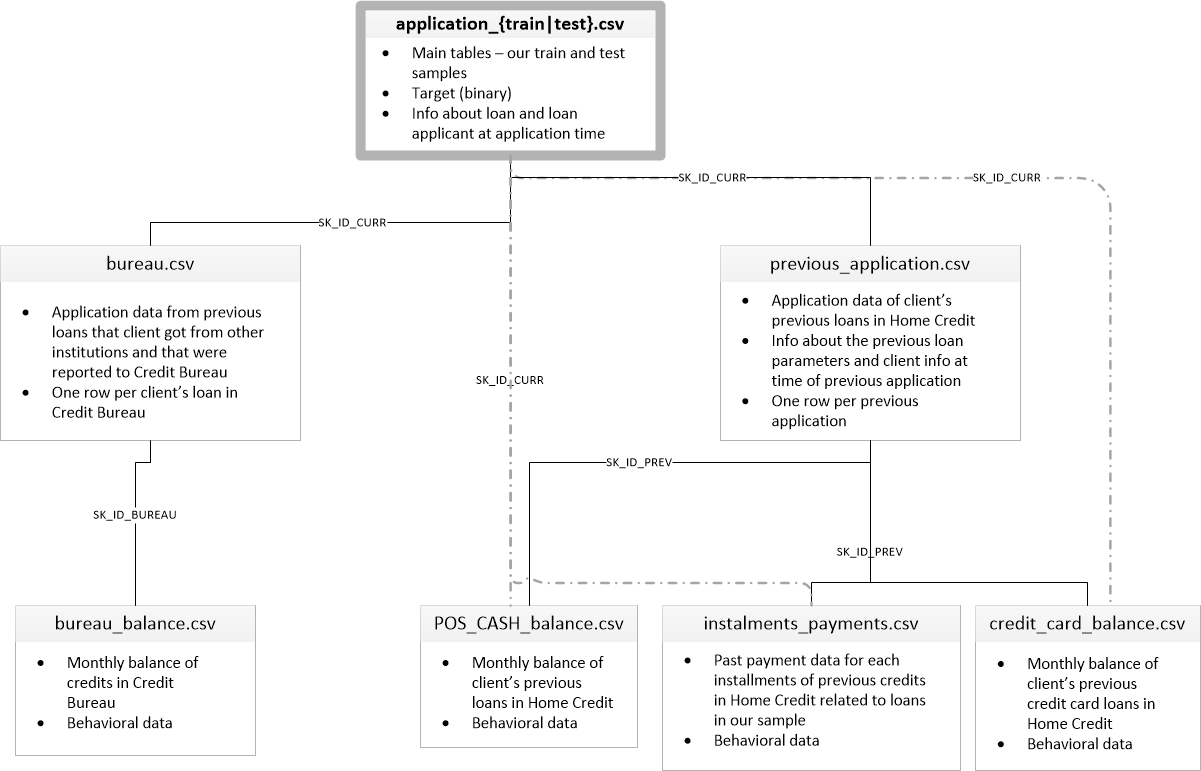

In [4]:
# Données d'entrainement
app_train = pd.read_csv('/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Données de test
app_test = pd.read_csv('/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Analyse exploratoire

Dans un premier temps, nous allons analyser notre jeu de données afin de mieux l'appréhender.

## Analyse de la distribution de la variable "Target"

Nous avons une variable "target" qui représente la variable cible à déterminer. Il s'agit de savoir si le client est en capacité de rembourser son prêt.

In [6]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

282686 ne sont pas en capacité de rembourser leur prêt contre 24825

<Axes: ylabel='Frequency'>

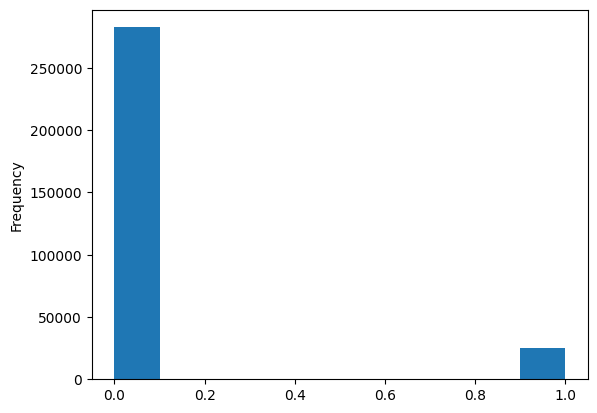

In [7]:
app_train['TARGET'].astype(int).plot.hist()

## Analyse des valeurs manquantes

In [8]:
from utils import missing_values_table

In [9]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


## Types de colonnes

In [10]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [11]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Encoding des variables catégorielles

In [12]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [13]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [14]:
# Obtenir les colonnes des deux DataFrames
train_columns = set(app_train.columns)
test_columns = set(app_test.columns)

# Trouver les colonnes présentes dans app_train mais pas dans app_test
missing_in_test = train_columns - test_columns

# Trouver les colonnes présentes dans app_test mais pas dans app_train
missing_in_train = test_columns - train_columns

# Afficher les résultats
print("Colonnes présentes dans app_train mais pas dans app_test :")
print(missing_in_test)

print("\nColonnes présentes dans app_test mais pas dans app_train :")
print(missing_in_train)

Colonnes présentes dans app_train mais pas dans app_test :
{'NAME_INCOME_TYPE_Maternity leave', 'CODE_GENDER_XNA', 'NAME_FAMILY_STATUS_Unknown', 'TARGET'}

Colonnes présentes dans app_test mais pas dans app_train :
set()


## Aller plus loin dans l'analyse

### Identifier les anomalies

In [15]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

La répartition des âges parait conforme.

In [16]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

La valeur maximale semble erronée => +100 ans

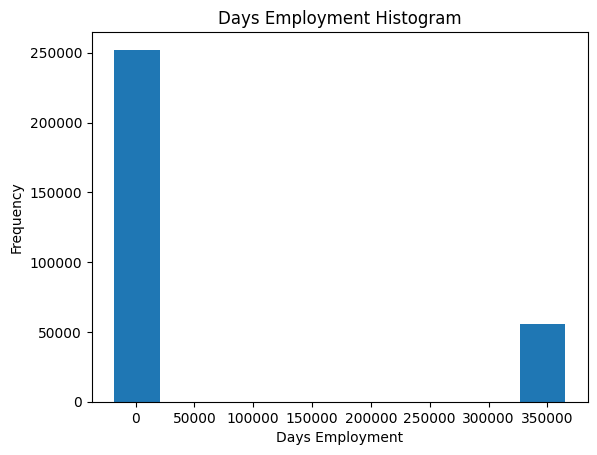

In [17]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [18]:
# Part des anomalies
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Les anomalies ont moins de défaut de paiement

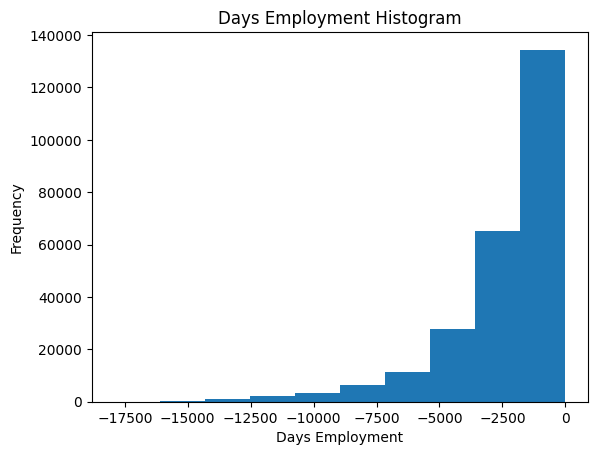

In [19]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

La distribution est visuelelment plus cohérente

In [20]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### Identifier les corrélations

In [21]:
app_train_copy = app_train.copy()

In [22]:
app_train_copy

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,False,False,False,False,False,True,False,True,False,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,True,False,False,False,False,False,False,True,False,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0,0,0,157500.0,254700.0,27558.0,225000.0,...,False,False,False,False,False,True,False,True,False,False
307507,456252,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,...,False,False,False,False,False,True,False,True,False,True
307508,456253,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,...,False,False,False,False,True,False,False,True,False,False
307509,456254,1,0,0,1,0,171000.0,370107.0,20205.0,319500.0,...,False,False,False,False,False,True,False,True,False,False


Méthode de corrélation avancée : 
- Prend en compte les variables continues avec Pearson et Spearman
- Gère les variables catégorielles encodées avec Cramér’s V
- Capture les relations non linéaires avec Mutual Information
- Évite les problèmes de biais liés aux méthodes classiques

In [23]:
from scipy.stats import chi2_contingency, spearmanr
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer

# 🛠️ Appliquer l'imputation et reconstruire le DataFrame
imputer = SimpleImputer(strategy="mean")  
app_train_copy_i = pd.DataFrame(imputer.fit_transform(app_train_copy), columns=app_train_copy.columns)

# 🛠️ Fonction pour calculer les corrélations adaptées à chaque type de variable
def compute_correlations(df, target_col):
    correlations = {}

    # Séparer les variables
    continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Supprimer TARGET de la liste des variables continues
    if target_col in continuous_vars:
        continuous_vars.remove(target_col)

    # 🔹 1. Corrélation de Pearson pour les variables continues
    pearson_corr = df[continuous_vars].corrwith(df[target_col], method='pearson')
    correlations.update(pearson_corr.to_dict())

    # 🔹 2. Corrélation de Spearman pour capturer les relations monotones
    spearman_corr = df[continuous_vars].corrwith(df[target_col], method='spearman')
    correlations.update({f"{col}_spearman": spearman_corr[col] for col in spearman_corr.index})

    # 🔹 3. Cramér’s V pour les variables catégorielles encodées
    def cramers_v(x, y):
        confusion_matrix = pd.crosstab(x, y)
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        r, k = confusion_matrix.shape
        return np.sqrt(chi2 / (n * (min(r, k) - 1)))

    for cat in categorical_vars:
        correlations[cat] = cramers_v(df[cat], df[target_col])

    # 🔹 4. Mutual Information (capte les relations non linéaires)
    mi = mutual_info_classif(df[continuous_vars + categorical_vars], df[target_col])
    for i, col in enumerate(continuous_vars + categorical_vars):
        correlations[f"{col}_MI"] = mi[i]
    
    # Transformer en DataFrame et trier
    corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)
    
    return corr_df

# 🚀 Exécuter l'analyse avec le DataFrame corrigé
correlation_results = compute_correlations(app_train_copy_i, 'TARGET')

# Afficher les 15 plus fortes corrélations positives et négatives
print("\n📌 Corrélations les plus positives avec TARGET :")
print(correlation_results.head(15))

print("\n📌 Corrélations les plus négatives avec TARGET :")
print(correlation_results.tail(15))


KeyboardInterrupt: 

In [24]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

La corrélation positive la plus importante avec la variable cible est "DAYS_BIRTH". Pour rappel, il s'agit de l'âge en jour du client au moment du prêt. Comme la valeur de la variable est négative, cela signifie qu'au plus le client est âgé, au plus le client a de chances de rembourser le prêt à temps.
La corrélation négtive la plus importante est "EXT_SOURCE_3", qui serait un score normalisé d'une source de donnée externe. Nous analyserons ça dans la section "Corrélation négative".

#### Corrélation positive

In [25]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

np.float64(-0.07823930830982694)

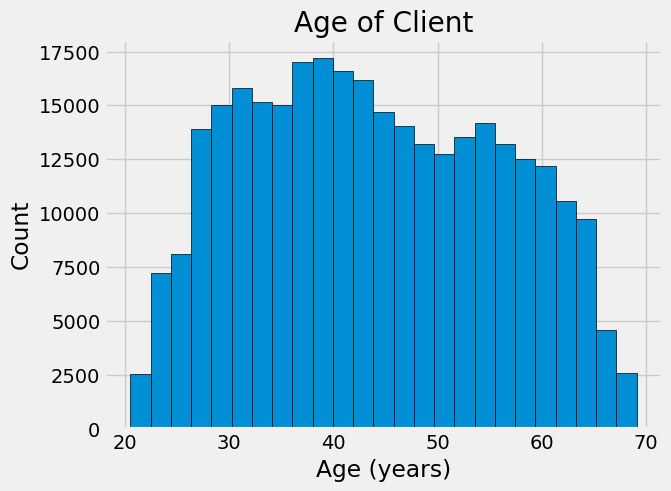

In [26]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Le graph ne nous donne pas suffisamment d'indication sur les outliers comme les âges sont pertinents. Afin de mieux visualiser, nous allons conduire un KDE. 

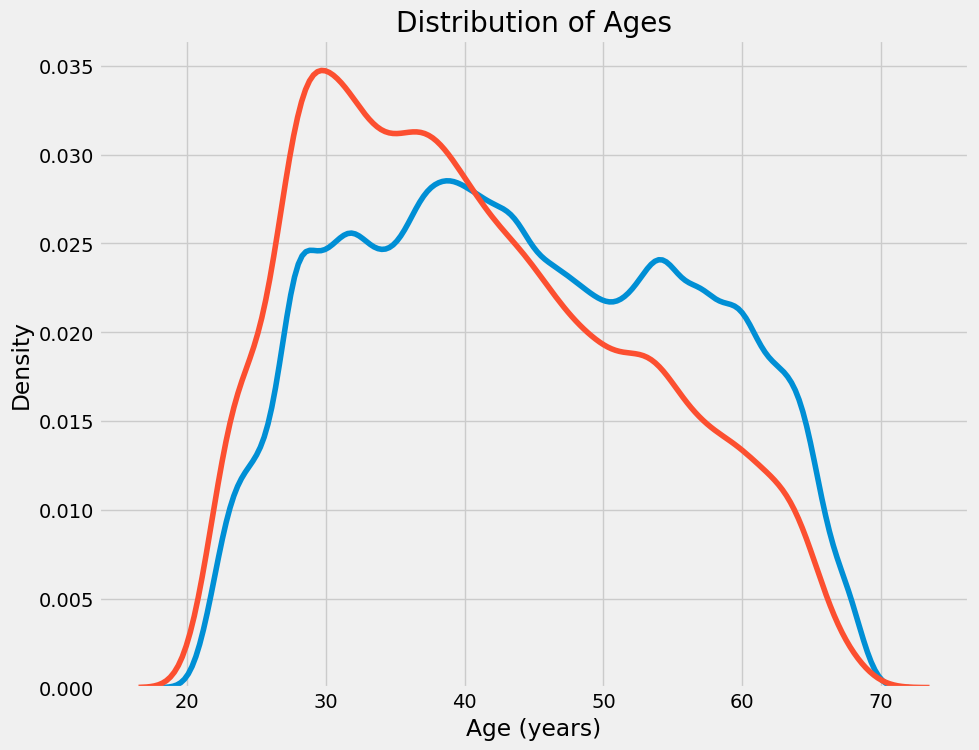

In [27]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Rouge : Target == 1 (Prêts non remmboursés à temps)
Bleu : Target == 0 (Prêts remboursés à temps)

In [28]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [29]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


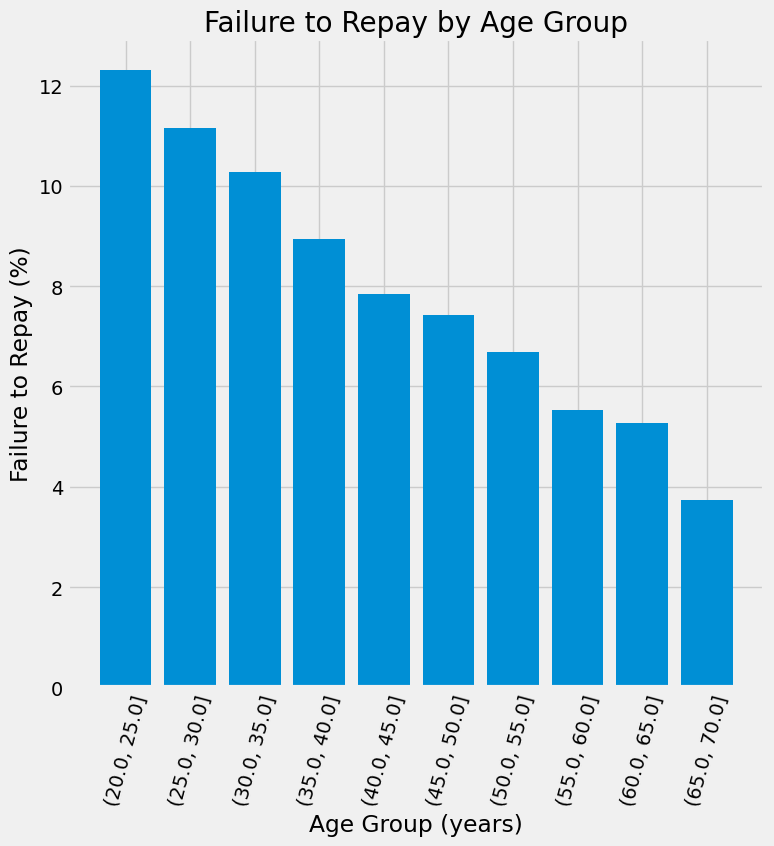

In [30]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

La tendance est plus claire ici : 
Au plus le client est jeune, au plus il a de risques de ne pas rembourser son prêt à temps.
Pour un client entre 20 et 25 ans, le risque est de +12% contre un peu moins de 4% pour un client de 65-70 ans, soit 3 fois plus important.

#### Corrélation négative

Les 3 variables ayant la corrélation négative la plus importantes sont EXT_SOURCE_1, EXT_SOURCE_2, et EXT_SOURCE_3. Nous allons regarder plus précisément leurs corrélations.

In [31]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


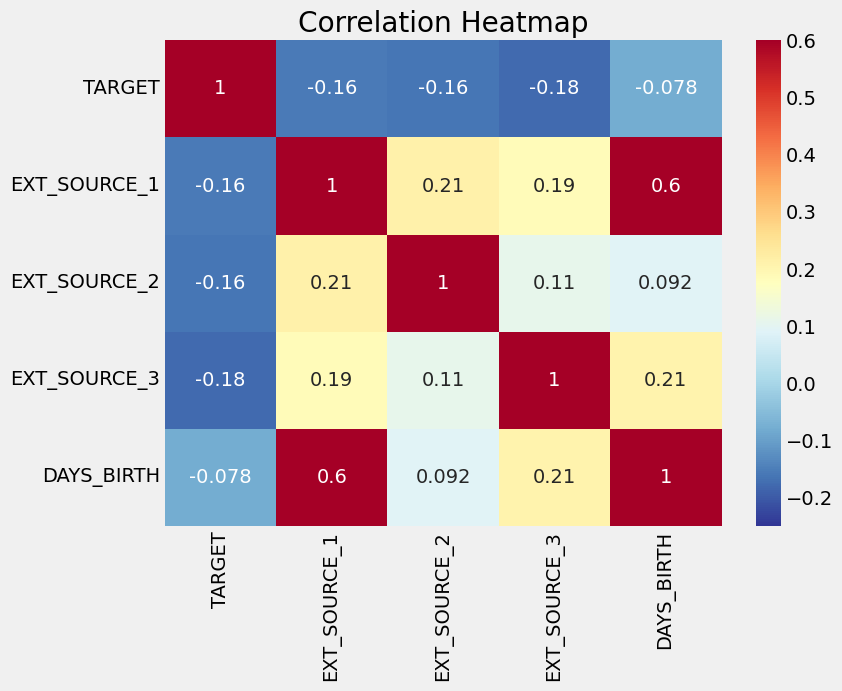

In [32]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Pour nos 3 variables EXT, si elles augementent, alors la probabilité que le client rembourse son prêt augmente également.
De plus, on remarque une corrélation positive "importante" entre DAYS_BIRTH et EXT_SOURCE_1, ce qui peut signifier que pour ce dernier, l'âge du client est un critère important.

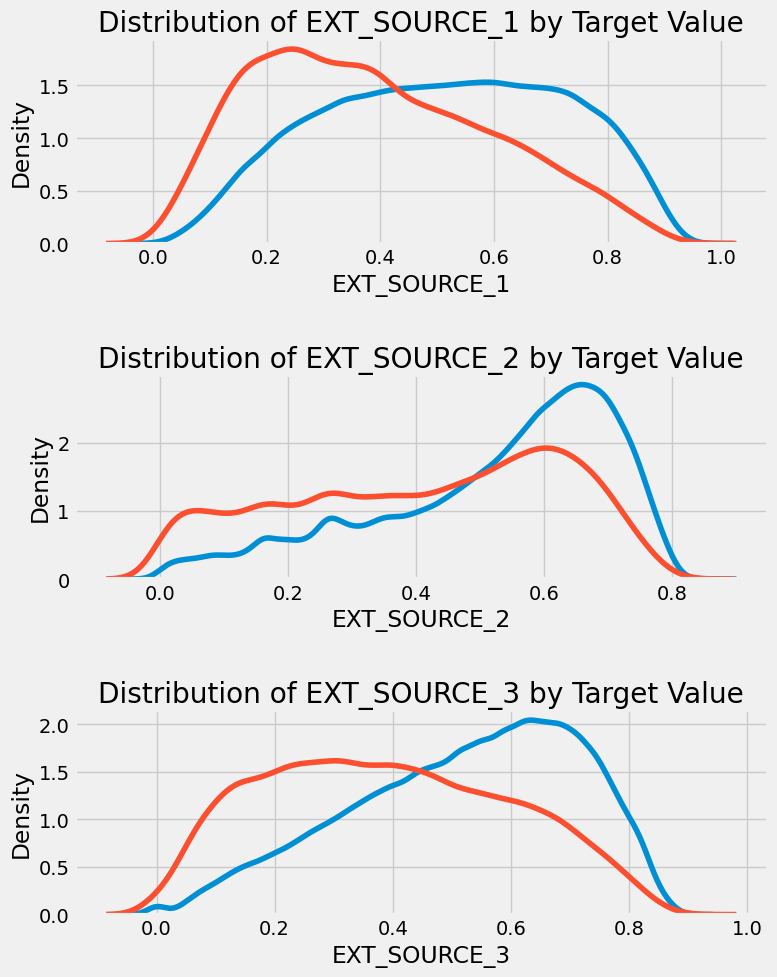

In [33]:
# Distribution des EXT_SOURCE selon la target
plt.figure(figsize = (8, 10))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

Les relations sont assez faibles mais ces variables peuvent demeurer utiles lorsqu'on regarde les corrélations. Par exemple, EXT_SOURCE_3, pourrait correspondre à la probabilité de remboursement de prêt.

## Pairs plot

Le pair plot permet d'identifier les relations entre les pairs de variables ainsi que les distributions de chacunes.

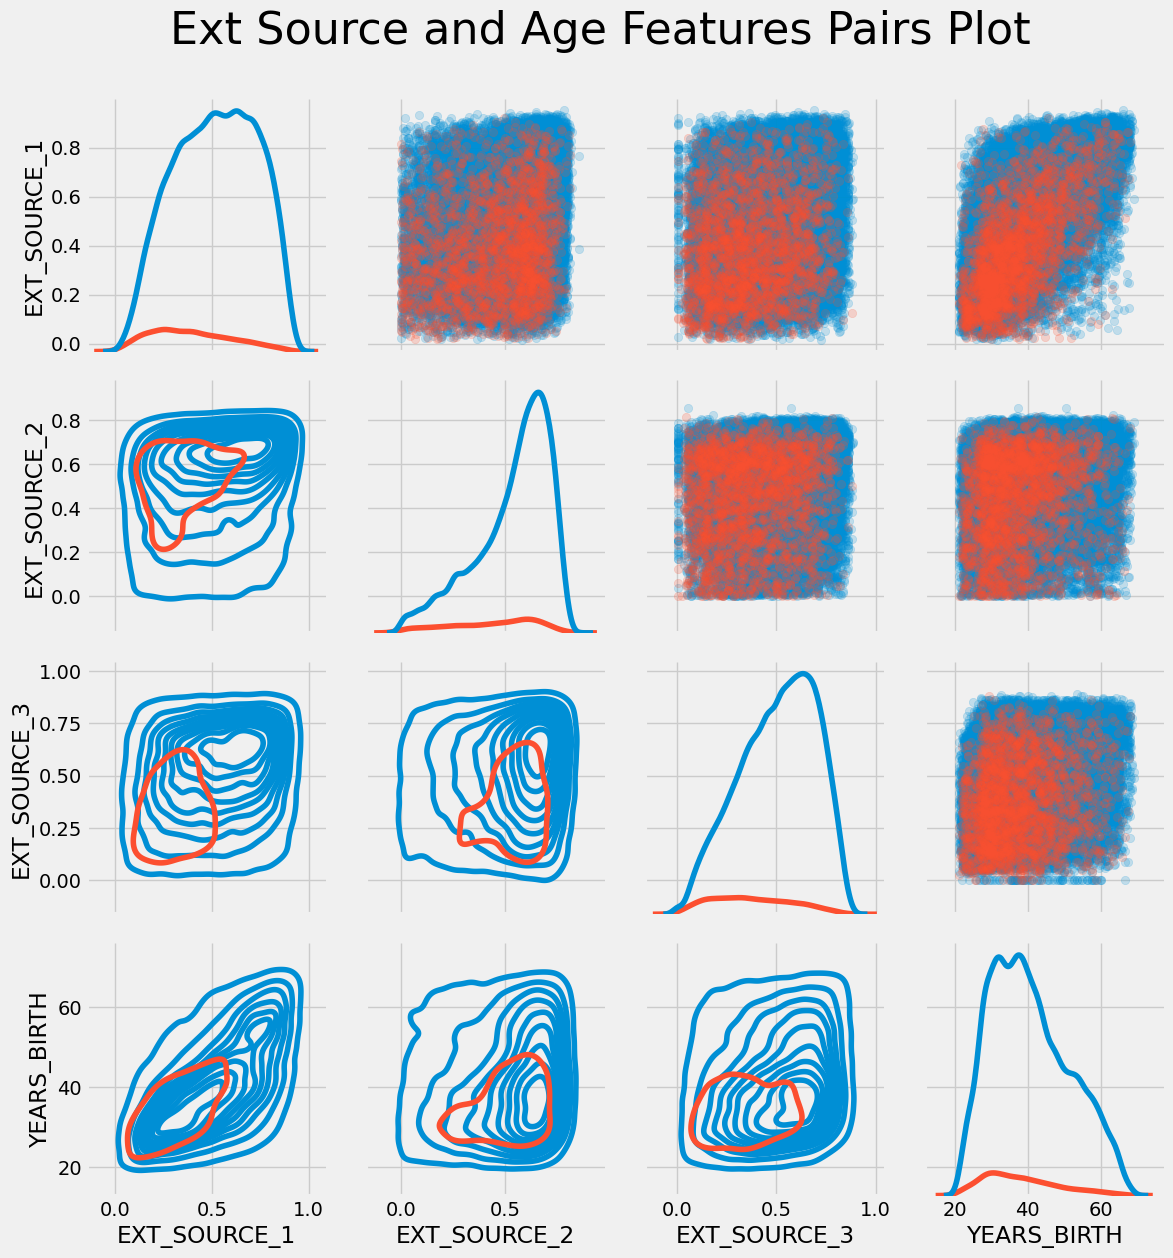

In [34]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height=3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

Rouge = les prêtes impayés
Bleu = prêtes payés
Encore une fois on retrouve une relation entre EXT_SOURCE_1 DAYS_BIRTH (ou YEARS_BIRTH), ce qui renforce la probabilité que ext_source y soit très sensible.

# Feature engineering 1

## Features polynomiales

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer


In [36]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
imputer = SimpleImputer(strategy='median')  
poly_target = poly_features['TARGET']

# Supprimer la colonne TARGET pour ne garder que les features
poly_features = poly_features.drop(columns=['TARGET'])

# Imputation des valeurs manquantes
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree=3)

# Transformation des données
poly_features = poly_transformer.fit_transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

In [37]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# Imputer for handling missing values
imputer = SimpleImputer(strategy='median')  
poly_target = poly_features['TARGET']

# Supprimer la colonne TARGET pour ne garder que les features
poly_features = poly_features.drop(columns=['TARGET'])

# Imputation des valeurs manquantes
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree=3)

# Une seule transformation des données
poly_features = poly_transformer.fit_transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


Nous avons un grand nombre de features, pour avoir le nom nous utilisons la méthode suivante :

In [38]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

Chaque feature a été rendue puissance 3.

In [39]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


Plusieurs des nouvelles features ont une corrélation plus importante que les originales. Ce qui sera très utile pour le machine learning.

In [40]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


In [41]:
poly_features['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

## Domain Knowledge

- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [42]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [43]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

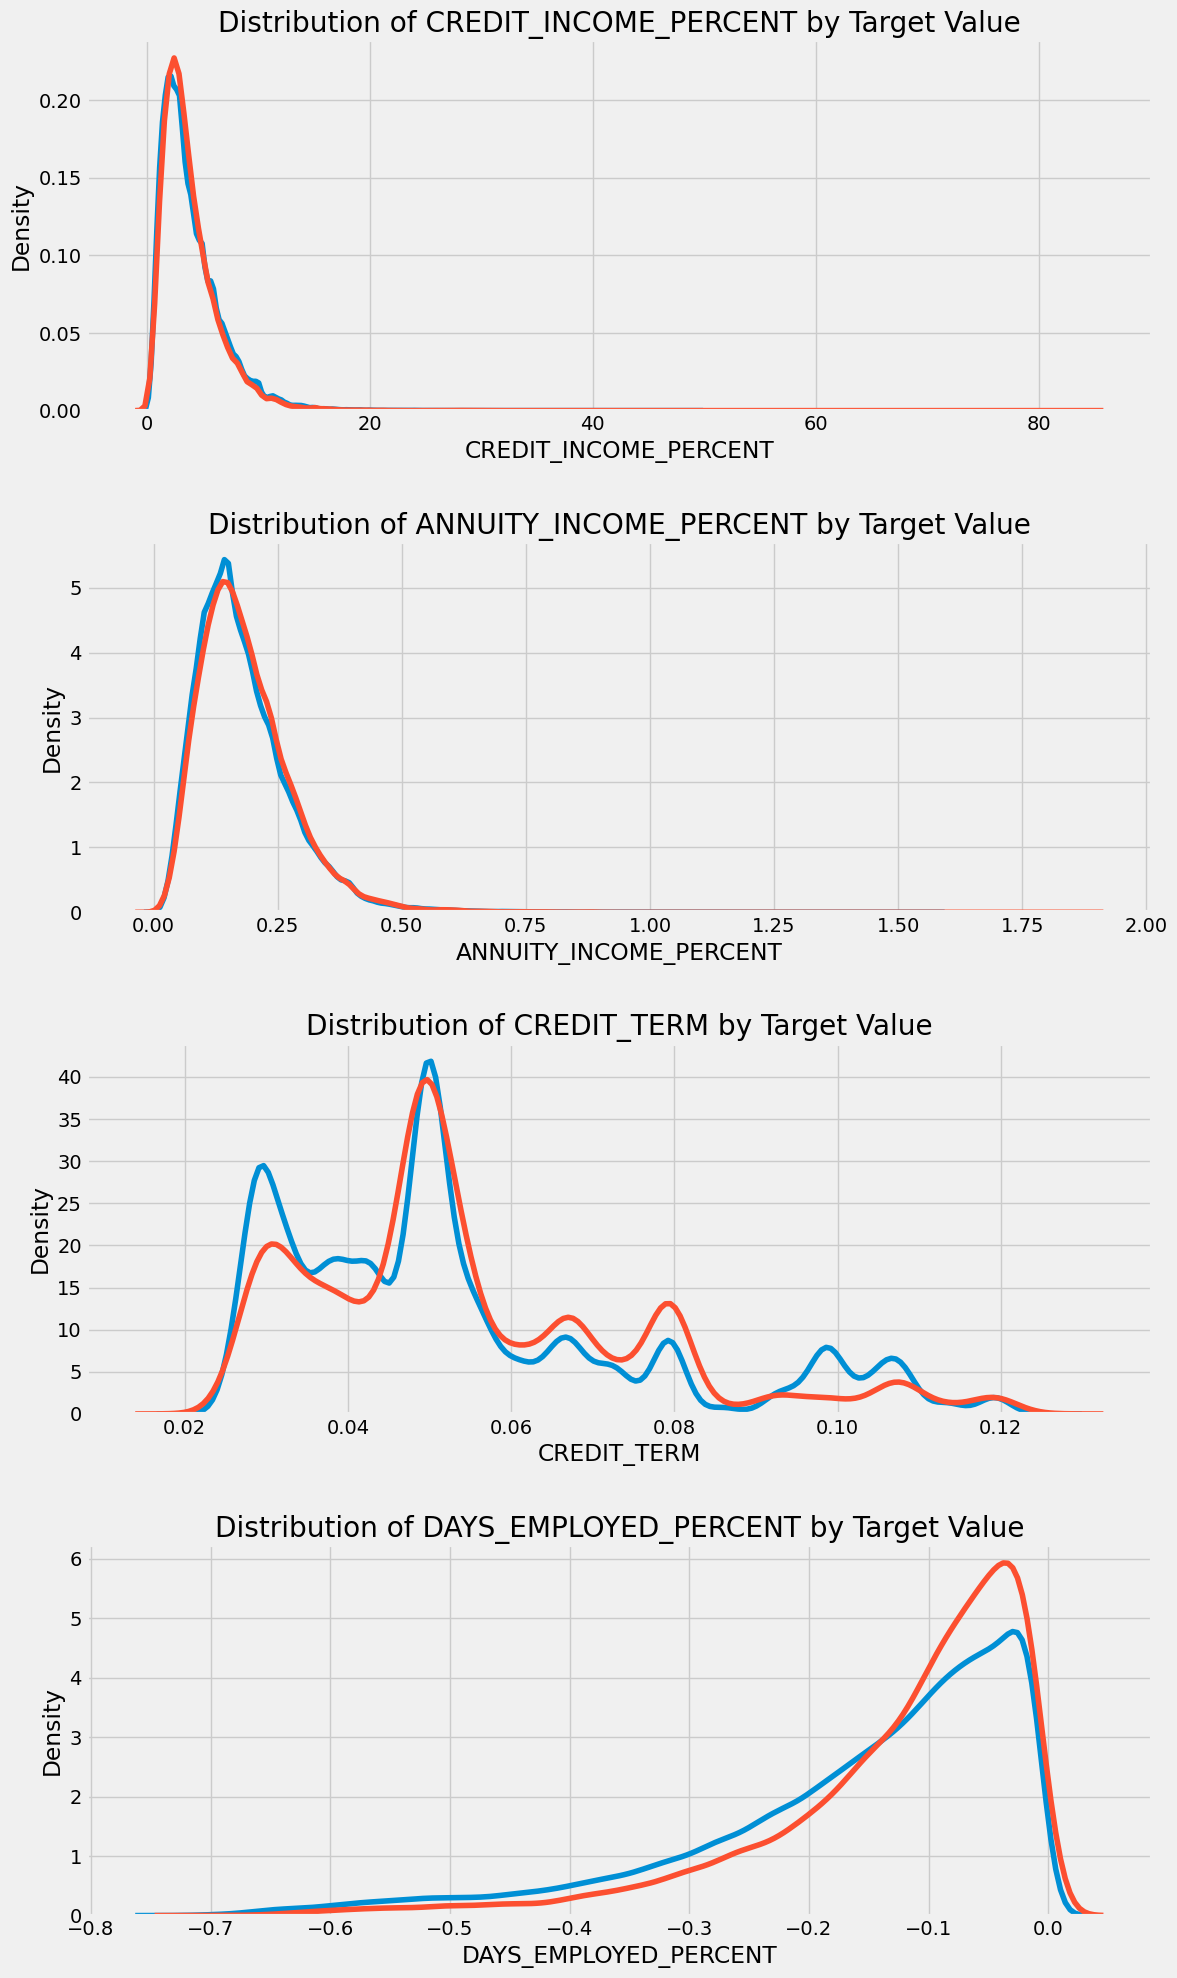

In [44]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

# LightGBM

In [45]:
# HOME CREDIT DEFAULT RISK COMPETITION
# Most features are created by applying min, max, mean, sum and var functions to grouped tables. 
# Little feature selection is done and overfitting might be a problem since many features are related.
# The following key ideas were used:
# - Divide or subtract important features to get rates (like annuity and income)
# - In Bureau Data: create specific features for Active credits and Closed credits
# - In Previous Applications: create specific features for Approved and Refused applications
# - Modularity: one function for each table (except bureau_balance and application_test)
# - One-hot encoding for categorical features
# All tables are joined with the application DF using the SK_ID_CURR key (except bureau_balance).
# You can use LightGBM with KFold or Stratified KFold.

# Update 16/06/2018:
# - Added Payment Rate feature
# - Removed index from features
# - Use standard KFold CV (not stratified)

import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

OSError: dlopen(/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/.envProjet7/lib/python3.12/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: '/usr/local/opt/gcc/lib/gcc/7/libgomp.1.dylib'
  Referenced from: '/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/.envProjet7/lib/python3.12/site-packages/lightgbm/lib_lightgbm.so'
  Reason: tried: '/usr/local/opt/gcc/lib/gcc/7/libgomp.1.dylib' (no such file), '/usr/lib/libgomp.1.dylib' (no such file)

In [ ]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv and application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Read data and merge
    df = pd.read_csv('/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv', nrows= num_rows)
    test_df = pd.read_csv('/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk/application_test.csv', nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = pd.concat([df, test_df]).reset_index(drop=True)
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df

In [ ]:
# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk/bureau.csv', nrows = num_rows)
    bb = pd.read_csv('/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk/bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

In [ ]:
# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv('/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk/previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv('/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk/POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg
    
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv('/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk/installments_payments.csv', nrows = num_rows)
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv('/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/Projet+Mise+en+prod+-+home-credit-default-risk/credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

In [ ]:
import lightgbm as lgb

In [ ]:
# LightGBM GBDT with KFold or Stratified KFold
# Parameters from Tilii kernel: https://www.kaggle.com/tilii7/olivier-lightgbm-parameters-by-bayesian-opt/code
def kfold_lightgbm(df, num_folds, stratified = False, debug= False):
    # Divide in training/validation and test data
    train_df = df[df['TARGET'].notnull()]
    test_df = df[df['TARGET'].isnull()]
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    del df
    gc.collect()
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=1001)
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )

        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', early_stopping_rounds= 200)

        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full AUC score %.6f' % roc_auc_score(train_df['TARGET'], oof_preds))
    # Write submission file and plot feature importance
    if not debug:
        test_df['TARGET'] = sub_preds
        test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index= False)
    display_importances(feature_importance_df)
    return feature_importance_df

In [ ]:
import lightgbm
print(lightgbm.__version__)

OSError: dlopen(/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/.envProjet7/lib/python3.12/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: '/usr/local/opt/gcc/lib/gcc/7/libgomp.1.dylib'
  Referenced from: '/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/.envProjet7/lib/python3.12/site-packages/lightgbm/lib_lightgbm.so'
  Reason: tried: '/usr/local/opt/gcc/lib/gcc/7/libgomp.1.dylib' (no such file), '/usr/lib/libgomp.1.dylib' (no such file)

In [ ]:
# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')

def main(debug = False):
    num_rows = 10000 if debug else None
    df = application_train_test(num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()
    with timer("Run LightGBM with kfold"):
        feat_importance = kfold_lightgbm(df, num_folds= 10, stratified= False, debug= debug)

if __name__ == "__main__":
    submission_file_name = "submission_kernel02.csv"
    with timer("Full model run"):
        main()


Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 145s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 191s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 129s
Installments payments df shape: (339587, 26)
Process installments payments - done in 110s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 61s
Starting LightGBM. Train shape: (307507, 797), test shape: (48744, 797)


TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'verbose_eval'

# Score métier (classic)

Objectif : Définir un score métier pour l'entraînement et l'évaluation des modèles

L'idée est de créer une métrique personnalisée qui reflète les enjeux métier en attribuant un coût différent aux faux positifs (FP) et aux faux négatifs (FN).
Ensuite, ce score sera utilisé pour évaluer et optimiser les modèles.

## Gestion déséquilibre des classes

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

In [47]:
# Supprime la target pour ne garder que les features
X = app_train.drop(columns=["TARGET"])  

# La colonne cible
y = app_train["TARGET"]  

In [48]:
# Align the dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data : ', app_train.shape)
print('Testing data :  ', app_test.shape)


Training data :  (307511, 240)
Testing data :   (48744, 240)


In [49]:
# Extraire le csv
output_file = 'app_test_adjusted.csv'
app_test.to_csv(output_file, index=False)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [51]:
print("Nombre de features dans X_train :", X_train.shape[1])
print("Nombre de features dans X_test :", X_test.shape[1])

Nombre de features dans X_train : 243
Nombre de features dans X_test : 243


In [52]:
# Extraire le csv
output_file = 'X_ref.csv'
X_train.to_csv(output_file, index=False)

In [53]:
# Calculer le pourcentage de valeurs manquantes
missing_X = X_train.isna().mean() * 100  
missing_y = y_train.isna().mean() * 100  

print("🔍 Pourcentage de valeurs manquantes dans X :")
print(missing_X[missing_X > 0])  

print("\n🔍 Pourcentage de valeurs manquantes dans y :", missing_y, "%")

🔍 Pourcentage de valeurs manquantes dans X :
AMT_ANNUITY                    0.004065
AMT_GOODS_PRICE                0.089834
DAYS_EMPLOYED                 17.943725
OWN_CAR_AGE                   66.021430
CNT_FAM_MEMBERS                0.000813
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.513382
AMT_REQ_CREDIT_BUREAU_WEEK    13.513382
AMT_REQ_CREDIT_BUREAU_MON     13.513382
AMT_REQ_CREDIT_BUREAU_QRT     13.513382
AMT_REQ_CREDIT_BUREAU_YEAR    13.513382
Length: 62, dtype: float64

🔍 Pourcentage de valeurs manquantes dans y : 0.0 %


In [54]:
X_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
181648,310536,0,0,0,2,90000.0,227520.0,13189.5,180000.0,0.008230,...,False,False,False,False,True,False,False,True,False,False
229245,365516,0,1,1,0,90000.0,161730.0,13095.0,135000.0,0.003069,...,False,False,False,False,False,False,False,False,False,False
122525,242055,0,0,1,0,135000.0,728847.0,26307.0,553500.0,0.020713,...,False,False,False,False,True,False,False,True,False,False
306311,454894,0,0,0,0,135000.0,474183.0,34636.5,391500.0,0.011703,...,True,False,False,False,False,False,False,True,False,False
300658,448321,0,0,1,0,180000.0,254700.0,27558.0,225000.0,0.006629,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31304,136325,1,0,1,1,135000.0,405000.0,20250.0,405000.0,0.035792,...,False,False,False,False,False,False,False,False,False,False
121193,240509,0,0,0,0,157500.0,272520.0,21528.0,225000.0,0.018801,...,False,False,False,False,True,False,False,True,False,False
248504,387513,0,0,0,0,90000.0,246357.0,24493.5,234000.0,0.025164,...,False,True,False,False,False,False,False,True,False,True
175469,303331,0,0,1,0,112500.0,810000.0,26901.0,810000.0,0.018209,...,False,False,False,False,False,False,False,False,False,True


In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  
X_train_imputed = imputer.fit_transform(X_train)  
X_train_imputed

array([[3.10536e+05, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.65516e+05, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.42055e+05, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [3.87513e+05, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.03331e+05, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.30259e+05, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [56]:
print("Nombre de features dans X_train :", X_train_imputed.shape[1])

Nombre de features dans X_train : 243


In [57]:
# Définition du Pipeline de Prétraitement avec SMOTE
preprocessing_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42))
])

# Application du SMOTE
X_resampled, y_resampled = preprocessing_pipeline.fit_resample(X_train_imputed, y_train)

In [58]:
print("Nombre de features dans X_sample :", X_resampled.shape[1])

Nombre de features dans X_sample : 243


In [59]:
X_resampled

array([[3.10536000e+05, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.65516000e+05, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.42055000e+05, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.33901316e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.19918663e+05, 0.00000000e+00, 8.35924399e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.65382571e+05, 0.00000000e+00, 0.00000000e+00, ...,
        1.13680373e-01, 0.00000000e+00, 1.13680373e-01]])

## Considération du coût métier

In [60]:
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [61]:
# Séparer les données en train et validation
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entraîner un modèle 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prédictions brutes (probabilités)
y_proba = model.predict_proba(X_val)[:, 1]  # Probabilité de la classe 1

# Définir un seuil optimal 
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)  # Convertir les probabilités en 0 ou 1

In [62]:
from sklearn.metrics import confusion_matrix, make_scorer

def business_score(y_true, y_pred, fp_weight=1, fn_weight=5):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    penalty = fp_weight * fp + fn_weight * fn

    # Calculer la pénalité maximale possible
    max_penalty = len(y_true) * max(fp_weight, fn_weight)

    # Normaliser la pénalité entre 0 et 1
    normalized_penalty = penalty / max_penalty if max_penalty > 0 else 0

    # Inverser la pénalité pour obtenir un score entre 0 et 1
    normalized_score = 1 - normalized_penalty

    return normalized_score

# Créer un scorer pour MLflow
business_scorer = make_scorer(business_score, greater_is_better=True)

In [63]:
# Calculer le score métier
score = business_score(y_val, y_pred)
print("Business Score :", score)

Business Score : 0.9559363254477117


Avec ce seuil, le coût total des erreurs (faux positifs et faux négatifs) est de 39 850.
Ce coût est élevé, probablement à cause d'un grand nombre de faux négatifs (FN), qui coûtent 10 fois plus cher que les faux positifs (FP).

## Optimisation du seuil de décision

In [64]:
best_score = float('inf')
best_threshold = 0.5  # Valeur par défaut

for t in np.linspace(0, 1, 100): 
    y_pred_temp = (y_proba >= t).astype(int)
    score_temp = business_score(y_val, y_pred_temp)
    
    if score_temp < best_score:
        best_score = score_temp
        best_threshold = t

print(f"Seuil optimal : {best_threshold:.2f} avec un Business Score de {best_score}")

Seuil optimal : 1.00 avec un Business Score de 0.7217333628122927


Cela réduit le nombre de faux négatifs (FN), qui coûtent cher.
Le coût global a baissé de 39 850 → 26 176, donc une réduction de 34%, ce qui signifie que notre modèle est plus rentable en utilisant ce seuil.

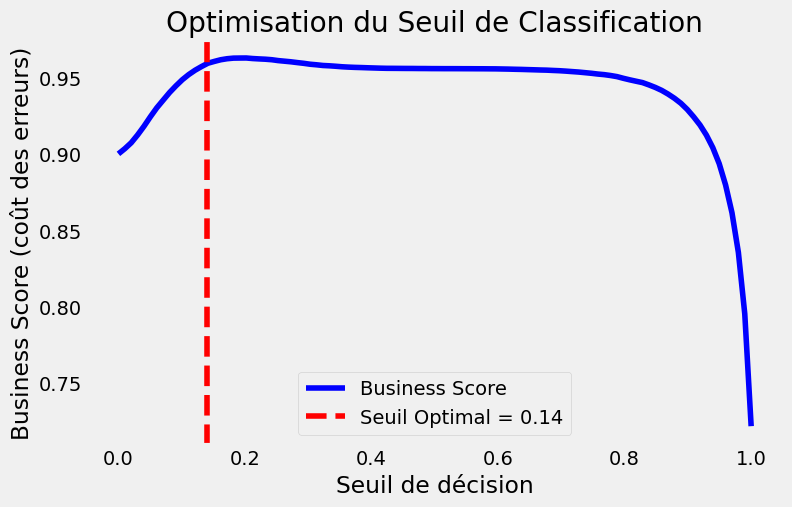

In [65]:
import matplotlib.pyplot as plt

# Liste des seuils testés
thresholds = np.linspace(0, 1, 100)
scores = [business_score(y_val, (y_proba >= t).astype(int)) for t in thresholds]

# Tracer la courbe du Business Score en fonction du seuil
plt.figure(figsize=(8, 5))
plt.plot(thresholds, scores, label="Business Score", color="b")
plt.axvline(0.14, color='r', linestyle='--', label=f"Seuil Optimal = 0.14")
plt.xlabel("Seuil de décision")
plt.ylabel("Business Score (coût des erreurs)")
plt.title("Optimisation du Seuil de Classification")
plt.legend()
plt.grid()
plt.show()


## Comparaison avec des méthodes classiques

Accuracy : Proportion des prédictions correctes.
AUC (Area Under Curve) : Capacité du modèle à distinguer les classes.
F1-score : Moyenne harmonique entre précision et recall.
Recall (Sensibilité) : Capacité à détecter les vrais positifs.
Précision : Proportion de vraies prédictions positives parmi les positives prédites.

In [66]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

y_pred = (y_proba >= best_threshold).astype(int)

accuracy = accuracy_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_proba)
f1 = f1_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)

print(f"Accuracy  : {accuracy:.4f}")
print(f"AUC       : {auc:.4f}")
print(f"F1-score  : {f1:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"Precision : {precision:.4f}")

Accuracy  : 0.7217
AUC       : 0.9779
F1-score  : 0.6150
Recall    : 0.4440
Precision : 1.0000


- Le modèle fait 85.04% de bonnes prédictions sur l'ensemble de test. Cela semble bon, mais attention, l'accuracy peut être trompeuse si les classes sont déséquilibrées.
- L'AUC (Area Under Curve) est très élevé (~0.98), ce qui signifie que le modèle distingue bien les classes positives et négatives. Une AUC proche de 1 indique une excellente séparation.
- C'est une mesure équilibrée entre précision et recall. Un F1-score élevé (86.62%) signifie que le modèle est bon à la fois pour identifier les vrais positifs et limiter les faux positifs.
- Le modèle capture 96.73% des cas positifs réels. C'est très élevé, donc le modèle ne rate presque aucun positif.
- Seules 78.42% des prédictions positives sont correctes. Cela signifie qu’il y a un nombre non négligeable de faux positifs.

## Optimisation des hyperparamètres

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
from sklearn.model_selection import train_test_split

X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

In [69]:
X_sample = imputer.transform(X_sample)

In [70]:
X_train.shape

(361836, 243)

In [71]:
X_sample.shape

(36183, 243)

### Dummy (baseline)

Le dummy classifier nous permettra d'obtenir une référence minimale pour comparer les performances du modèle.

In [72]:
# Création du DummyClassifier (stratégie 'stratified' pour imiter la distribution des classes)
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)

# Entraînement du modèle sur les mêmes données
dummy_clf.fit(X_sample, y_sample)

# Évaluation avec le business scorer
dummy_score = cross_val_score(dummy_clf, X_sample, y_sample, scoring=business_scorer, cv=3)

print("Score métier du DummyClassifier :", dummy_score.mean())

Score métier du DummyClassifier : 0.698924909487881


### Decision tree

In [73]:
# Création du modèle (arbre de décision simple)
tree_clf = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)

param_grid = {
    'max_features': [50, 100],  
    'max_depth': [5, 10]        
}

gsDT = RandomizedSearchCV(tree_clf, param_grid, scoring=business_scorer, cv=3, random_state=42)
gsDT.fit(X_sample, y_sample)

print("Meilleurs paramètres :", gsDT.best_params_)
print("Meilleur score métier :", gsDT.best_score_)

Meilleurs paramètres : {'max_features': 100, 'max_depth': 10}
Meilleur score métier : 0.9174197827709145


### Random Forest

In [74]:
model = RandomForestClassifier(class_weight="balanced", max_features=0.5)

gsRF = RandomizedSearchCV(model, param_grid, scoring=business_scorer, cv=3, random_state=42)
gsRF.fit(X_sample, y_sample)

print("Meilleurs paramètres :", gsRF.best_params_)
print("Meilleur score métier :", gsRF.best_score_)

Meilleurs paramètres : {'max_features': 50, 'max_depth': 10}
Meilleur score métier : 0.9460796506646768


### GradientBoosting

In [75]:
# Création du modèle (Gradient Boosting)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

gsGB = RandomizedSearchCV(gb_clf, param_grid, scoring=business_scorer, cv=3, random_state=42)
gsGB.fit(X_sample, y_sample)

print("Meilleurs paramètres :", gsGB.best_params_)
print("Meilleur score métier :", gsGB.best_score_)

Meilleurs paramètres : {'max_features': 100, 'max_depth': 10}
Meilleur score métier : 0.9543818920487522


## Tracking des résultats

In [76]:
y_train_pred_proba = gsRF.predict_proba(X_sample)[:, 1]
auc_train = roc_auc_score(y_sample, y_train_pred_proba)
print(f"AUC-ROC sur l'entraînement : {auc_train}")

AUC-ROC sur l'entraînement : 0.9880498651252286


In [77]:
import mlflow
import mlflow.sklearn

In [78]:
with mlflow.start_run():
    mlflow.log_param("best_threshold", best_threshold)
    mlflow.log_metric("business_score", best_score)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("auc", auc)

In [79]:
# Charger les runs enregistrés
client = mlflow.tracking.MlflowClient()

# Récupérer l'ID de la dernière run
experiment_id = mlflow.get_experiment_by_name("Default").experiment_id
runs = client.search_runs(experiment_id, order_by=["start_time desc"], max_results=1)
latest_run = runs[0]

# Afficher les paramètres et métriques
print("Paramètres enregistrés :")
print(latest_run.data.params)

print("\n Métriques enregistrées :")
print(latest_run.data.metrics)

Traceback (most recent call last):
  File "/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/.envProjet7/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 328, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/.envProjet7/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 422, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/.envProjet7/lib/python3.12/site-packages/mlflow/store/tracking/file_store.py", line 1368, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gregoirehamy/Desktop/OpenClassrooms/Projet7/.envProjet

Paramètres enregistrés :
{'best_threshold': '1.0'}

 Métriques enregistrées :
{'business_score': 0.7217333628122927, 'accuracy': 0.7217333628122927, 'auc': 0.9779118146366911}


In [80]:
mlflow.set_tracking_uri(uri="http://localhost:8080")

In [81]:
mlflow.set_tracking_uri("http://127.0.0.1:8080")

In [82]:
imputer = SimpleImputer(strategy="mean") 
X_train_imputed = imputer.fit_transform(X_train)

In [83]:
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
print("Nombre total de NaN après imputation :", X_train.isna().sum().sum())

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [85]:
# Définition des modèles
models = {
    "DummyClassifier": dummy_clf,
    "DecisionTree": gsDT.best_estimator_,
    "RandomForestClassifier": gsRF.best_estimator_,
    "GradientBoosting": gsGB.best_estimator_,
}

# Démarrer MLflow
mlflow.set_experiment("Model_Comparison_test_4")

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name) as run:

        # Entraînement et Prédiction
        model.fit(X_sample, y_sample)
        y_proba = model.predict_proba(X_sample)[:, 1]
        y_pred = (y_proba >= 0.5).astype(int)

        # Calcul des métriques
        accuracy = accuracy_score(y_sample, y_pred)
        auc = roc_auc_score(y_sample, y_proba)
        f1 = f1_score(y_sample, y_pred)
        recall = recall_score(y_sample, y_pred)
        precision = precision_score(y_sample, y_pred)
        business_score_value = business_score(y_sample, y_pred)

        # Enregistrement des métriques sur MLflow
        mlflow.log_param("Model", model_name)
        mlflow.log_metric("Accuracy", accuracy)
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("F1-score", f1)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("Precision", precision)
        mlflow.log_metric("Business_Score", score)

        # Sauvegarde du modèle MLflow
        model_uri = f"runs:/{run.info.run_id}/{model_name}_model"
        mlflow.sklearn.log_model(model, artifact_path=f"{model_name}_model")

        # Enregistrement dans le Model Registry
        mlflow.register_model(model_uri, model_name)

        # Affichage des résultats
        print(f"\n🔹 {model_name}")
        print(f"Accuracy  : {accuracy:.4f}")
        print(f"AUC       : {auc:.4f}")
        print(f"F1-score  : {f1:.4f}")
        print(f"Recall    : {recall:.4f}")
        print(f"Precision : {precision:.4f}")
        print(f"Business Score : {business_score_value:.4f}")


print("Les résultats sont enregistrés dans MLflow")


2025/02/26 14:29:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'DummyClassifier' already exists. Creating a new version of this model...
2025/02/26 14:29:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DummyClassifier, version 11
Created version '11' of model 'DummyClassifier'.



🔹 DummyClassifier
Accuracy  : 0.4996
AUC       : 0.4996
F1-score  : 0.4973
Recall    : 0.4974
Precision : 0.4972
Business Score : 0.6999
🏃 View run DummyClassifier at: http://127.0.0.1:8080/#/experiments/323868903968289132/runs/27c00938615c495e90cdc1d956dfd5bd
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/323868903968289132


2025/02/26 14:30:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'DecisionTree' already exists. Creating a new version of this model...
2025/02/26 14:30:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DecisionTree, version 11
Created version '11' of model 'DecisionTree'.



🔹 DecisionTree
Accuracy  : 0.9031
AUC       : 0.9574
F1-score  : 0.8935
Recall    : 0.8163
Precision : 0.9868
Business Score : 0.9075
🏃 View run DecisionTree at: http://127.0.0.1:8080/#/experiments/323868903968289132/runs/d83814c5131941538864c89a3196fa3d
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/323868903968289132


2025/02/26 14:30:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'RandomForestClassifier' already exists. Creating a new version of this model...
2025/02/26 14:30:59 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestClassifier, version 10
Created version '10' of model 'RandomForestClassifier'.



🔹 RandomForestClassifier
Accuracy  : 0.9491
AUC       : 0.9879
F1-score  : 0.9461
Recall    : 0.8978
Precision : 1.0000
Business Score : 0.9491
🏃 View run RandomForestClassifier at: http://127.0.0.1:8080/#/experiments/323868903968289132/runs/013c9a79a1ed4035916b6fb41377af28
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/323868903968289132


2025/02/26 14:36:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'GradientBoosting' already exists. Creating a new version of this model...
2025/02/26 14:36:28 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: GradientBoosting, version 9
Created version '9' of model 'GradientBoosting'.



🔹 GradientBoosting
Accuracy  : 0.9914
AUC       : 0.9999
F1-score  : 0.9913
Recall    : 0.9827
Precision : 1.0000
Business Score : 0.9914
🏃 View run GradientBoosting at: http://127.0.0.1:8080/#/experiments/323868903968289132/runs/2a1c3f61446b4f5e9efd15c79f0fe48e
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/323868903968289132
Les résultats sont enregistrés dans MLflow


Recommandation :
- GradientBoosting semble être le meilleur choix en termes de performance globale (AUC, Accuracy, F1-score, Precision, Recall). Cependant, il est également le plus lent à entraîner. Si le temps d'entraînement est un facteur critique pour vous, vous pourriez envisager RandomForestClassifier comme une alternative, bien qu'il soit légèrement moins performant que GradientBoosting.
- RandomForestClassifier offre également une très bonne performance avec un temps d'entraînement plus court que GradientBoosting. Il pourrait être un bon compromis si vous avez besoin d'un modèle performant mais plus rapide à entraîner.
- DecisionTree est le plus rapide à entraîner, mais ses performances sont inférieures à celles de GradientBoosting et RandomForestClassifier.
- DummyClassifier n'est pas recommandé pour une utilisation en production car ses performances sont très faibles.

Conclusion :
- Meilleur modèle en termes de performance : GradientBoosting
- Meilleur compromis performance/temps d'entraînement : RandomForestClassifier

# Score métier (polynomial)

## Gestion déséquilibre des classes

In [ ]:
# Supprime la target pour ne garder que les features
X = app_train_poly 

# La colonne cible
y = poly_features["TARGET"]  

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Calculer le pourcentage de valeurs manquantes
missing_X = X_train.isna().mean() * 100  
missing_y = y_train.isna().mean() * 100  

print("🔍 Pourcentage de valeurs manquantes dans X :")
print(missing_X[missing_X > 0])  

print("\n🔍 Pourcentage de valeurs manquantes dans y :", missing_y, "%")

🔍 Pourcentage de valeurs manquantes dans X :
AMT_ANNUITY                    0.004065
AMT_GOODS_PRICE                0.089834
OWN_CAR_AGE                   66.021430
CNT_FAM_MEMBERS                0.000813
EXT_SOURCE_1_x                56.337599
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.513382
AMT_REQ_CREDIT_BUREAU_WEEK    13.513382
AMT_REQ_CREDIT_BUREAU_MON     13.513382
AMT_REQ_CREDIT_BUREAU_QRT     13.513382
AMT_REQ_CREDIT_BUREAU_YEAR    13.513382
Length: 61, dtype: float64

🔍 Pourcentage de valeurs manquantes dans y : 0.0 %


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  
X_train_imputed = imputer.fit_transform(X_train)  
X_train_imputed

array([[ 3.10536000e+05,  2.00000000e+00,  9.00000000e+04, ...,
        -4.77201530e+03,  9.42112241e+07, -1.85995941e+12],
       [ 3.65516000e+05,  0.00000000e+00,  9.00000000e+04, ...,
        -4.40525521e+03,  1.26534287e+08, -3.63450586e+12],
       [ 2.42055000e+05,  0.00000000e+00,  1.35000000e+05, ...,
        -6.92566446e+03,  2.23255886e+08, -7.19688213e+12],
       ...,
       [ 3.87513000e+05,  0.00000000e+00,  9.00000000e+04, ...,
        -1.07787782e+04,  3.64220375e+08, -1.23071910e+13],
       [ 3.03331000e+05,  0.00000000e+00,  1.12500000e+05, ...,
        -1.46327537e+04,  3.98717047e+08, -1.08643449e+13],
       [ 4.30259000e+05,  0.00000000e+00,  1.26000000e+05, ...,
        -1.01192219e+04,  3.30021823e+08, -1.07631204e+13]])

In [ ]:
# Définition du Pipeline de Prétraitement avec SMOTE
preprocessing_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42))
])

# Application du SMOTE
X_resampled, y_resampled = preprocessing_pipeline.fit_resample(X_train_imputed, y_train)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier


# Pipeline complet avec SMOTE et un Classifieur
full_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy="mean")),  
    ('smote', SMOTE(random_state=42)),            
    ('clf', DecisionTreeClassifier(random_state=42))  
])

# Validation Croisée avec Stratification
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Évaluation des scores avec le Pipeline complet
scores = cross_val_score(full_pipeline, X_train, y_train, scoring='accuracy', cv=cv)

print("Scores de Validation Croisée : ", scores)
print("Moyenne des scores : ", scores.mean())

KeyboardInterrupt: 

## Coût métier

In [ ]:
# Séparer les données en train et validation
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entraîner un modèle 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prédictions brutes (probabilités)
y_proba = model.predict_proba(X_val)[:, 1]  # Probabilité de la classe 1

# Définir un seuil optimal 
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)  # Convertir les probabilités en 0 ou 1

In [ ]:
from sklearn.metrics import confusion_matrix, make_scorer

def business_score(y_true, y_pred, fp_weight=1, fn_weight=10):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    penalty = fp_weight * fp + fn_weight * fn

    # Calculer la pénalité maximale possible
    max_penalty = len(y_true) * max(fp_weight, fn_weight)

    # Normaliser la pénalité entre 0 et 1
    normalized_penalty = penalty / max_penalty if max_penalty > 0 else 0

    # Inverser la pénalité pour obtenir un score entre 0 et 1
    normalized_score = 1 - normalized_penalty

    return normalized_score

# Créer un scorer pour MLflow
business_scorer = make_scorer(business_score, greater_is_better=True)

In [ ]:
# Calculer le score métier
score = business_score(y_val, y_pred)
print("Business Score :", score)

Business Score : 0.9565067433119611


## Optimisation du seuil de décision

## Optimisation des hyperparamètres

In [ ]:
# Création du DummyClassifier (stratégie 'stratified' pour imiter la distribution des classes)
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)

# Entraînement du modèle sur les mêmes données
dummy_clf.fit(X_sample, y_sample)

# Évaluation avec le business scorer
dummy_score = cross_val_score(dummy_clf, X_sample, y_sample, scoring=business_scorer, cv=3)

print("Score métier du DummyClassifier :", dummy_score.mean())

Score métier du DummyClassifier : 0.7235469695713457


In [ ]:
# Création du modèle (arbre de décision simple)
tree_clf = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)

param_grid = {
    'max_features': [50, 100],  
    'max_depth': [5, 10]        
}

gsDT = RandomizedSearchCV(tree_clf, param_grid, scoring=business_scorer, cv=3, random_state=42)
gsDT.fit(X_sample, y_sample)

print("Meilleurs paramètres :", gsDT.best_params_)
print("Meilleur score métier :", gsDT.best_score_)

Meilleurs paramètres : {'max_features': 100, 'max_depth': 10}
Meilleur score métier : 0.9090677942680263


In [ ]:
model = RandomForestClassifier(class_weight="balanced", max_features=0.5)

gsRF = RandomizedSearchCV(model, param_grid, scoring=business_scorer, cv=3, random_state=42)
gsRF.fit(X_sample, y_sample)

print("Meilleurs paramètres :", gsRF.best_params_)
print("Meilleur score métier :", gsRF.best_score_)

Meilleurs paramètres : {'max_features': 50, 'max_depth': 10}
Meilleur score métier : 0.9419147113285243


In [ ]:
# Création du modèle (Gradient Boosting)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

gsGB = RandomizedSearchCV(gb_clf, param_grid, scoring=business_scorer, cv=3, random_state=42)
gsGB.fit(X_sample, y_sample)

print("Meilleurs paramètres :", gsGB.best_params_)
print("Meilleur score métier :", gsGB.best_score_)

Meilleurs paramètres : {'max_features': 100, 'max_depth': 10}
Meilleur score métier : 0.9544150567946273


## Tracking des résultats

In [ ]:
mlflow.set_tracking_uri("http://127.0.0.1:8080")

In [ ]:
# Définition des modèles
models = {
    "DummyClassifier_Poly": dummy_clf,
    "DecisionTree_Poly": gsDT.best_estimator_,
    "RandomForestClassifier_Poly": gsRF.best_estimator_,
    "GradientBoosting_Poly": gsGB.best_estimator_,
}

# Démarrer MLflow
mlflow.set_experiment("Model_Comparison_Poly")

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name) as run:

        # Entraînement et Prédiction
        model.fit(X_sample, y_sample)
        y_proba = model.predict_proba(X_sample)[:, 1]
        y_pred = (y_proba >= 0.5).astype(int)

        # Calcul des métriques
        accuracy = accuracy_score(y_sample, y_pred)
        auc = roc_auc_score(y_sample, y_proba)
        f1 = f1_score(y_sample, y_pred)
        recall = recall_score(y_sample, y_pred)
        precision = precision_score(y_sample, y_pred)
        business_score_value = business_score(y_sample, y_pred)

        # Enregistrement des métriques sur MLflow
        mlflow.log_param("Model", model_name)
        mlflow.log_metric("Accuracy", accuracy)
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("F1-score", f1)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("Precision", precision)
        mlflow.log_metric("Business_Score", score)

        # Sauvegarde du modèle MLflow
        model_uri = f"runs:/{run.info.run_id}/{model_name}_model"
        mlflow.sklearn.log_model(model, artifact_path=f"{model_name}_model")

        # Enregistrement dans le Model Registry
        mlflow.register_model(model_uri, model_name)

        # Affichage des résultats
        print(f"\n🔹 {model_name}")
        print(f"Accuracy  : {accuracy:.4f}")
        print(f"AUC       : {auc:.4f}")
        print(f"F1-score  : {f1:.4f}")
        print(f"Recall    : {recall:.4f}")
        print(f"Precision : {precision:.4f}")
        print(f"Business Score : {business_score_value:.4f}")


print("Les résultats sont enregistrés dans MLflow")


2025/02/21 11:12:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'DummyClassifier_Poly'.
2025/02/21 11:12:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DummyClassifier_Poly, version 1
Created version '1' of model 'DummyClassifier_Poly'.



🔹 DummyClassifier_Poly
Accuracy  : 0.4996
AUC       : 0.4996
F1-score  : 0.4973
Recall    : 0.4974
Precision : 0.4972
Business Score : 0.7249
🏃 View run DummyClassifier_Poly at: http://127.0.0.1:8080/#/experiments/849475621587596491/runs/f2cc5972e0fb4b7090a8b13b7ff8dbc0
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/849475621587596491


2025/02/21 11:12:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'DecisionTree_Poly'.
2025/02/21 11:12:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: DecisionTree_Poly, version 1
Created version '1' of model 'DecisionTree_Poly'.



🔹 DecisionTree_Poly
Accuracy  : 0.9054
AUC       : 0.9591
F1-score  : 0.8993
Recall    : 0.8496
Precision : 0.9553
Business Score : 0.9232
🏃 View run DecisionTree_Poly at: http://127.0.0.1:8080/#/experiments/849475621587596491/runs/62eafbdbc5cf42ec8decd842b408c8ee
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/849475621587596491


2025/02/21 11:14:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'RandomForestClassifier_Poly'.
2025/02/21 11:14:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestClassifier_Poly, version 1
Created version '1' of model 'RandomForestClassifier_Poly'.



🔹 RandomForestClassifier_Poly
Accuracy  : 0.9463
AUC       : 0.9881
F1-score  : 0.9430
Recall    : 0.8921
Precision : 1.0000
Business Score : 0.9463
🏃 View run RandomForestClassifier_Poly at: http://127.0.0.1:8080/#/experiments/849475621587596491/runs/a8794dfbd89c48aaa820850dd6cc5e45
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/849475621587596491


2025/02/21 11:17:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'GradientBoosting_Poly'.
2025/02/21 11:17:53 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: GradientBoosting_Poly, version 1
Created version '1' of model 'GradientBoosting_Poly'.



🔹 GradientBoosting_Poly
Accuracy  : 0.9903
AUC       : 0.9999
F1-score  : 0.9902
Recall    : 0.9806
Precision : 1.0000
Business Score : 0.9903
🏃 View run GradientBoosting_Poly at: http://127.0.0.1:8080/#/experiments/849475621587596491/runs/48d3a86375d44d4c85ef6d8ce831a83d
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/849475621587596491
Les résultats sont enregistrés dans MLflow


# Feature importance

In [86]:
import shap
from lime.lime_tabular import LimeTabularExplainer
import os

In [87]:
X_ref=pd.read_csv('X_ref.csv')
X_ref.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,310536,0,0,0,2,90000.0,227520.0,13189.5,180000.0,0.008230,...,False,False,False,False,True,False,False,True,False,False
1,365516,0,1,1,0,90000.0,161730.0,13095.0,135000.0,0.003069,...,False,False,False,False,False,False,False,False,False,False
2,242055,0,0,1,0,135000.0,728847.0,26307.0,553500.0,0.020713,...,False,False,False,False,True,False,False,True,False,False
3,454894,0,0,0,0,135000.0,474183.0,34636.5,391500.0,0.011703,...,True,False,False,False,False,False,False,True,False,False
4,448321,0,0,1,0,180000.0,254700.0,27558.0,225000.0,0.006629,...,False,False,False,False,False,False,False,False,False,False


In [88]:
print(gsRF.best_estimator_.n_features_in_)

243


In [89]:
X_sample_df = pd.DataFrame(X_sample, columns=X_ref.columns)

In [93]:
print("Nombre total de NaN  :", X_sample_df.isna().sum().sum())

Nombre total de NaN  : 0


In [128]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 🌲 Extraire le meilleur modèle RandomForest
best_rf = gsRF.best_estimator_

# 📊 Prendre un échantillon aléatoire (ex. 100 clients) pour éviter lenteur
sample_size = 100
X_sample_shap = X_sample_df.sample(n=min(sample_size, len(X_sample_df)), random_state=42)

# 🚀 Calcul des valeurs SHAP
shap_values = explainer.shap_values(X_sample_shap)

In [121]:
# SHAP Explainer
explainer = shap.Explainer(best_rf)
shap_values = explainer(X_sample_shap)

# Initialize the SHAP JavaScript library
shap.initjs()

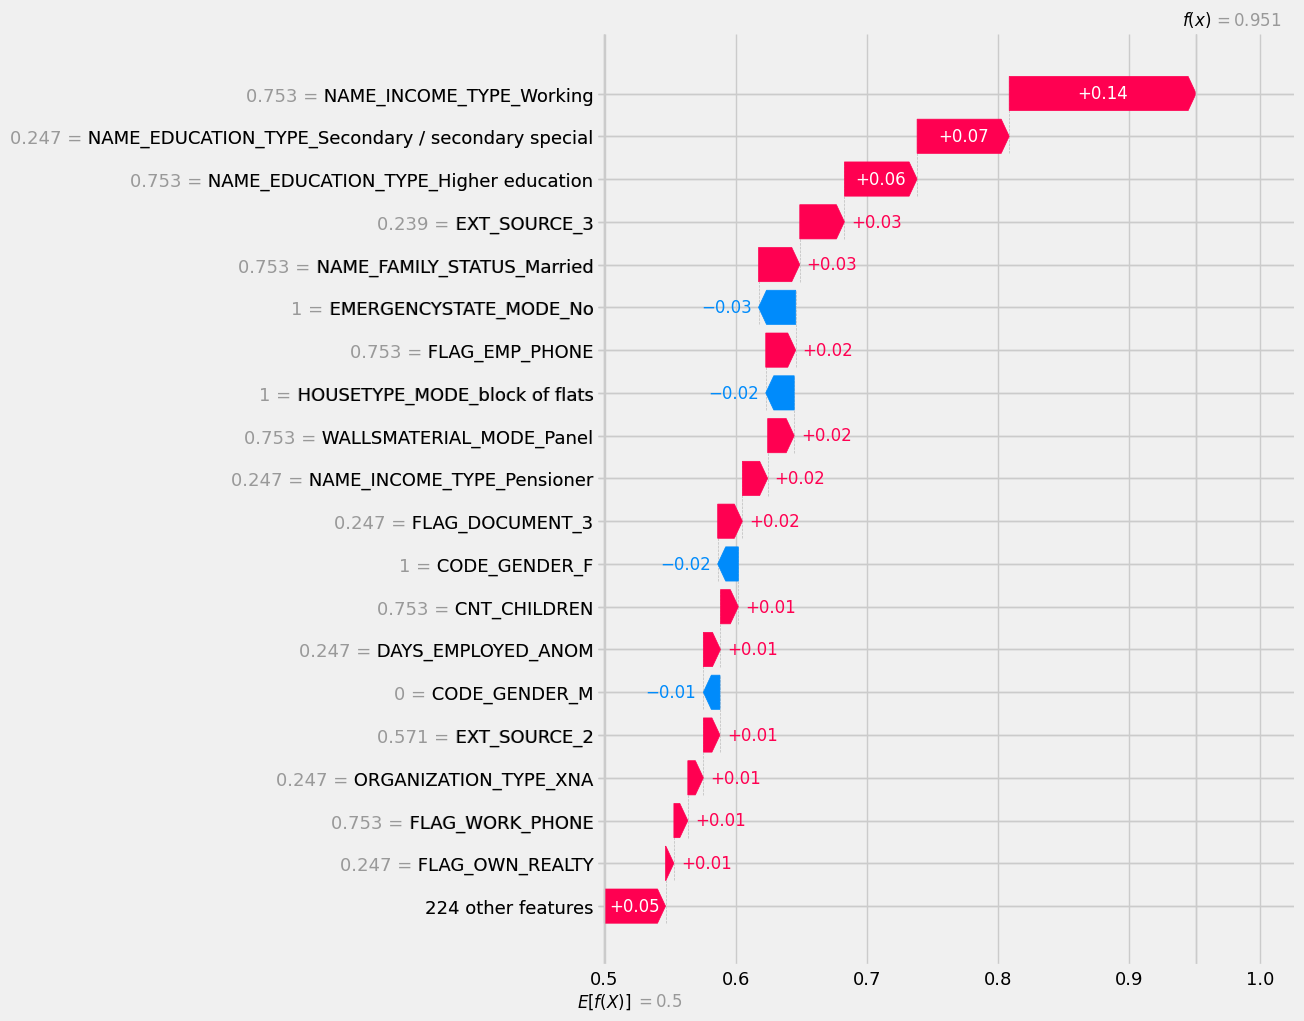

In [129]:
# Feature importance globale
shap.plots.waterfall(shap.Explanation(
    values=shap_values.values[0, :, 1],
    base_values=shap_values.base_values[0, 1],
    data=X_sample_shap.iloc[0]
), max_display=20) 

La prédiction finale est très élevée (0.951), ce qui signifie que le modèle est quasiment sûr que les individus appartiennent à la classe prédite.

- NAME_INCOME_TYPE_Working (+0.14) → Être employé augmente fortement la probabilité de remboursement.
- NAME_EDUCATION_TYPE_Higher education (+0.07) → Un niveau d’éducation élevé améliore la prédiction.
- EXT_SOURCE_3 (+0.06) → Score externe élevé, donc plus fiable pour rembourser.
- EMERGENCYSTATE_MODE_No (-0.03) → L'absence d'une situation d’urgence pourrait être interprétée comme un signal négatif par le modèle.
- CODE_GENDER_F (-0.02) → Peut indiquer que certaines caractéristiques associées aux femmes influencent légèrement négativement la prédiction (à analyser plus en détail).

Les autres features ont un impact relativement faible, bien qu'elles contribuent collectivement à hauteur de +0.05.


Feature importance locale pour le client 0


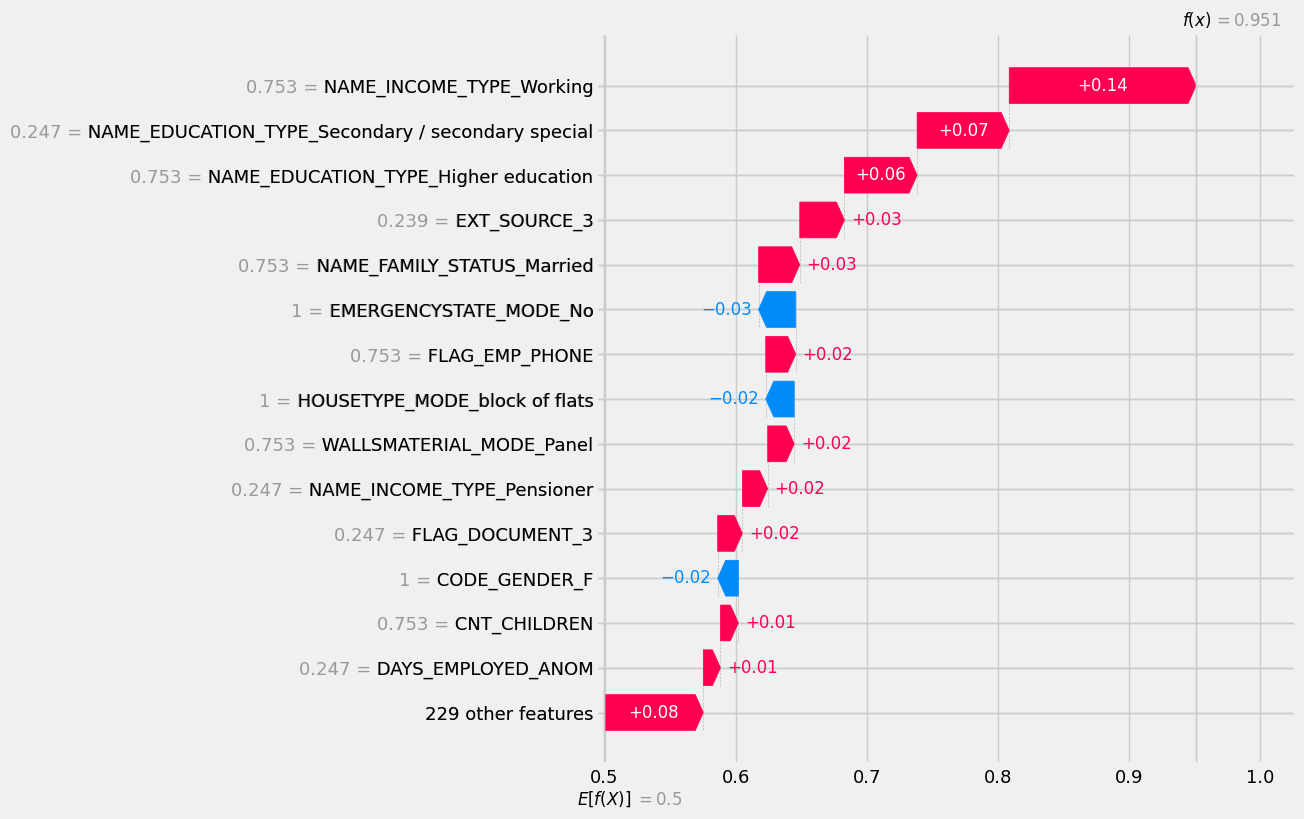


Feature importance locale pour le client 1


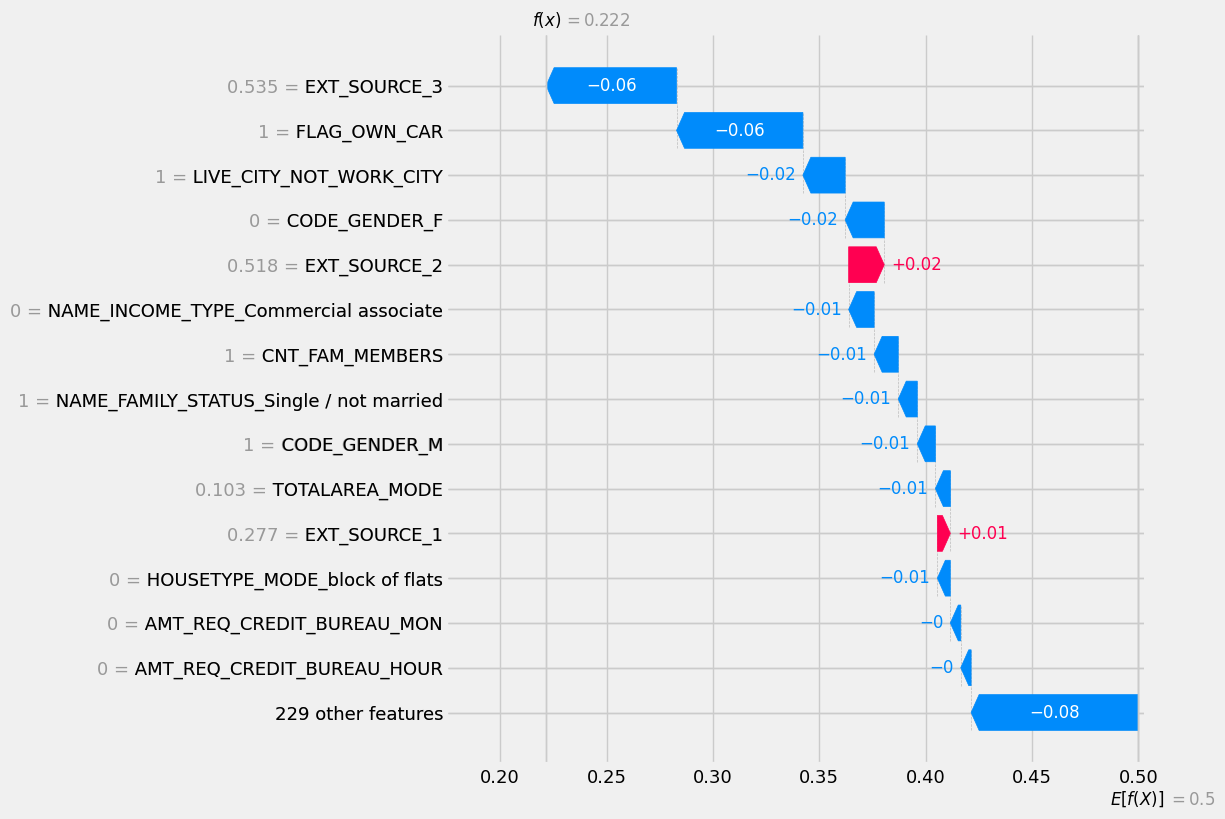


Feature importance locale pour le client 2


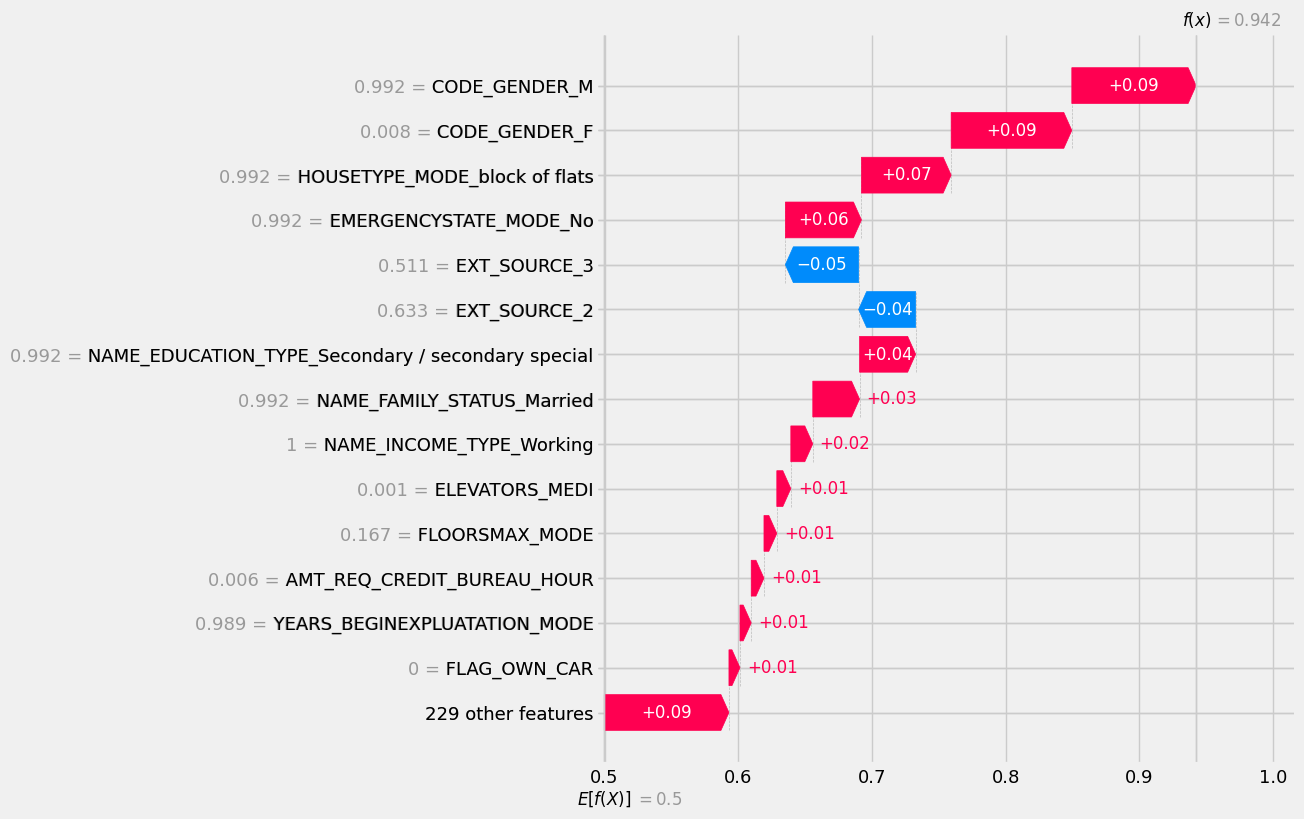

In [130]:
# Feature importance locale
for idx in [0, 1, 2]:  
    print(f"\nFeature importance locale pour le client {idx}")
    shap.plots.waterfall(shap.Explanation(
        values=shap_values.values[idx, :, 1],
        base_values=shap_values.base_values[idx, 1],
        data=X_sample_shap.iloc[idx]
    ), max_display=15)


Feature importance locale pour le client 67


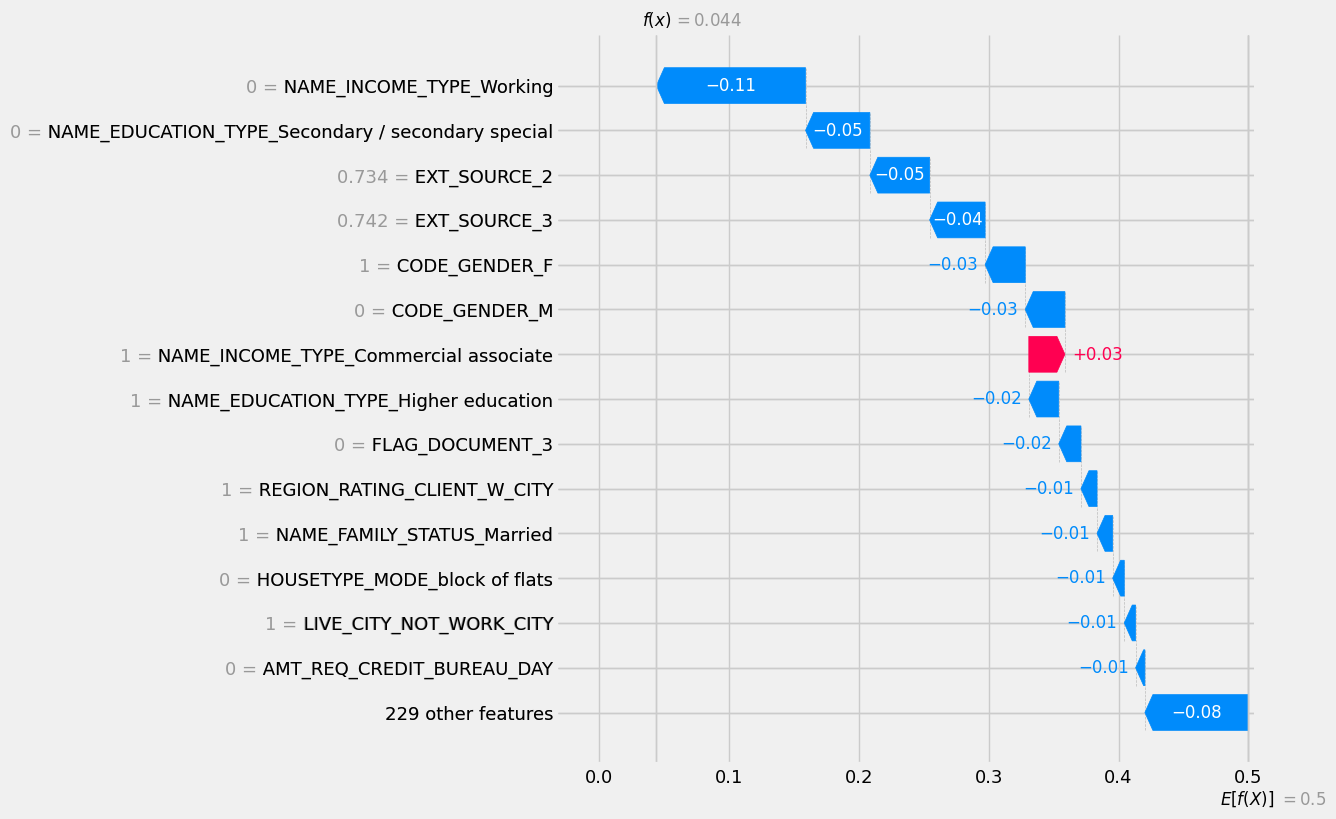

In [131]:
# Trouver l'index du client avec la plus faible probabilité de remboursement
idx_min = shap_values.values[:, :, 1].sum(axis=1).argmin()

print(f"\nFeature importance locale pour le client {idx_min}")
shap.plots.waterfall(shap.Explanation(
    values=shap_values.values[idx_min, :, 1],
    base_values=shap_values.base_values[idx_min, 1],
    data=X_sample_shap.iloc[idx_min]
), max_display=15)

Pour le client avec le taux le plus faible : 
- NAME_INCOME_TYPE_Working (-0.11) : Être dans cette catégorie a fortement diminué la probabilité de remboursement.
- EXT_SOURCE_2 et EXT_SOURCE_3 (-0.05 et -0.04) : Ces scores externes, souvent liés au risque de crédit, ont également joué en sa défaveur.
- CODE_GENDER_F (-0.03) : Être une femme a légèrement réduit la probabilité de remboursement.
- NAME_INCOME_TYPE_Commercial associate (+0.03) : Cette caractéristique a légèrement augmenté la probabilité, mais pas suffisamment pour compenser les autres effets négatifs.


# Test unitaire

- Valeurs manquantes
- Distribution
- Encoding
- Equilibrage après SMOTE

pytest test_pipeline.py -v

Dans le terminal : pytest test_pipeline.py